In [35]:
#Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

#Data Description:
#Murder -- Muder rates in different places of United States
#Assualt- Assualt rate in different places of Unied States
#rbanPop - urban population in different places of United States
#Rape - Rape rate in different places of United States


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN,KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [37]:
data = pd.read_csv("crime_data.csv")

In [38]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [39]:
data.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [40]:
data1 = data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [41]:
data1

In [42]:
#Normalization function
def norm_func(i):
  x = (i-i.min()/i.max()-i.min())
  return x

In [43]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,0:])

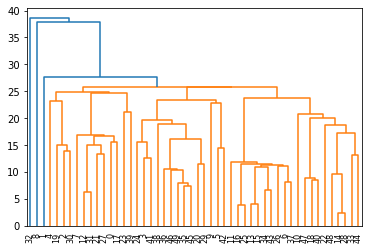

In [44]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [45]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [46]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])


In [47]:
df_norm['clustersid']=hc.labels_
df_norm

,Murder,Assault,UrbanPop,Rape,clustersid
0,12.354023,190.866469,25.648352,13.741304,0
1,9.154023,217.866469,15.648352,37.041304,3
2,7.254023,248.866469,47.648352,23.541304,0
3,7.954023,144.866469,17.648352,12.041304,0
4,8.154023,230.866469,58.648352,33.141304,0
5,7.054023,158.866469,45.648352,31.241304,0
6,2.454023,64.866469,44.648352,3.641304,0
7,5.054023,192.866469,39.648352,8.341304,0
8,14.554023,289.866469,47.648352,24.441304,2
9,16.554023,165.866469,27.648352,18.341304,0


In [48]:
df_norm.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.622108,116.632426,33.690905,13.160453
1,1,12.154023,291.866469,12.648352,8.641304
2,2,14.554023,289.866469,47.648352,24.441304
3,3,9.154023,217.866469,15.648352,37.041304


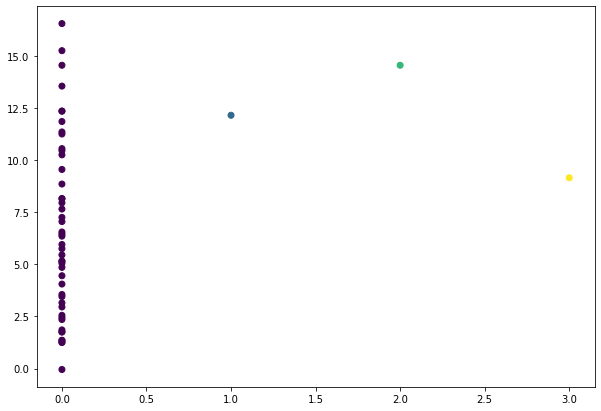

In [50]:
# Plot Clusters
plt.figure(figsize=(10,7))  
plt.scatter(df_norm['clustersid'],df_norm['Murder'], c=hc.labels_) 

In [14]:
#KMean

In [15]:
import numpy as np
scaler = StandardScaler()
data = scaler.fit_transform(data.iloc[:,1:])

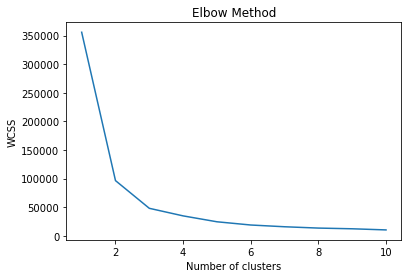

In [53]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
#Build Cluster algorithm

clusters_new = KMeans(3, random_state=42)
clusters_new.fit(data)

KMeans(n_clusters=3, random_state=42)

In [55]:
clusters_new.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [52]:
df_norm1=df_norm.copy()
df_norm1['clusters_newid']=clusters_new.labels_
df_norm1

,Murder,Assault,UrbanPop,Rape,clustersid,clusters_newid
0,12.354023,190.866469,25.648352,13.741304,0,3
1,9.154023,217.866469,15.648352,37.041304,3,2
2,7.254023,248.866469,47.648352,23.541304,0,2
3,7.954023,144.866469,17.648352,12.041304,0,3
4,8.154023,230.866469,58.648352,33.141304,0,2
5,7.054023,158.866469,45.648352,31.241304,0,2
6,2.454023,64.866469,44.648352,3.641304,0,0
7,5.054023,192.866469,39.648352,8.341304,0,0
8,14.554023,289.866469,47.648352,24.441304,2,2
9,16.554023,165.866469,27.648352,18.341304,0,3


In [19]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.31830274,  0.59039932, -0.16762087],
       [-1.11783581, -0.93954982, -0.97657842],
       [ 1.19960221,  0.74266221,  1.41426923],
       [ 0.88321132, -0.82279055,  0.01946669]])

In [20]:
#DBSCAN

In [21]:
array = data.values
scaler.fit(array)
X = scaler.transform(array)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

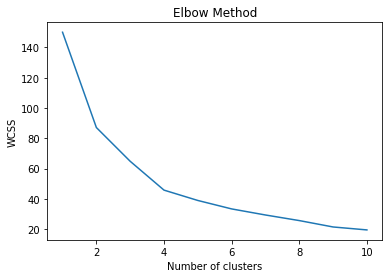

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()